In [1]:
# 분석전에 필요한 라이브러리들을 불러오기

# plotly라이브러리가 없다면 아래 설치
# conda install -c plotly plotly=4.12.0
# conda install -c conda-forge cufflinks-py
# conda install seaborn


import glob 
import os
import sys, subprocess
from subprocess import Popen, PIPE
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(font="D2Coding") 
# sns.set(font="Malgun Gothic") 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go 
import chart_studio.plotly as py
import cufflinks as cf
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()



# 사이킷런 라이브러리 불러오기 _ 통계, 학습 테스트세트 분리, 선형회귀등
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error


C:\Users\shahn\AppData\Local\Temp\ipykernel_9916\2540245095.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


In [2]:
df_raw = pd.read_excel('data\온실가스계수개발연구_OD_결과_DATA (오봉보건진료소).xlsx')
df_raw.head()

,외벽,지붕,바닥,창호열관류율,SHGC,문열관류율,난방효율,냉방효율,급탕효율,조명밀도,중부1,중부2,남부,제주,난방,냉방,급탕,조명,환기
0,0.466,0.264,0.48,3.2,0.688,2.8,87,3.9,90,10.551802,1,0,0,0,114.9,2.9,6.8,25.9,0
1,0.349,0.264,0.48,3.2,0.688,2.8,87,3.9,90,10.551802,1,0,0,0,103.0,3.1,6.8,25.9,0
2,0.233,0.264,0.48,3.2,0.688,2.8,87,3.9,90,10.551802,1,0,0,0,91.2,3.4,6.8,25.9,0
3,0.466,0.231,0.48,3.2,0.688,2.8,87,3.9,90,10.551802,1,0,0,0,113.6,2.9,6.8,25.9,0
4,0.466,0.206,0.48,3.2,0.688,2.8,87,3.9,90,10.551802,1,0,0,0,112.6,2.9,6.8,25.9,0


In [3]:
df_raw.columns

Index(['외벽', '지붕', '바닥', '창호열관류율', 'SHGC', '문열관류율', '난방효율', ' 냉방효율', '급탕효율',
       '조명밀도', '중부1', '중부2', '남부', '제주', '난방', '냉방', '급탕', '조명', '환기'],
      dtype='object')

In [16]:
lm_features = ['외벽',
 '지붕',
 '바닥',
 '창호열관류율',
 'SHGC',
 '문열관류율',
 '난방효율',
 ' 냉방효율',
 '급탕효율',
 '조명밀도',
 '중부1',
 '중부2',
 '남부',
 '제주',]

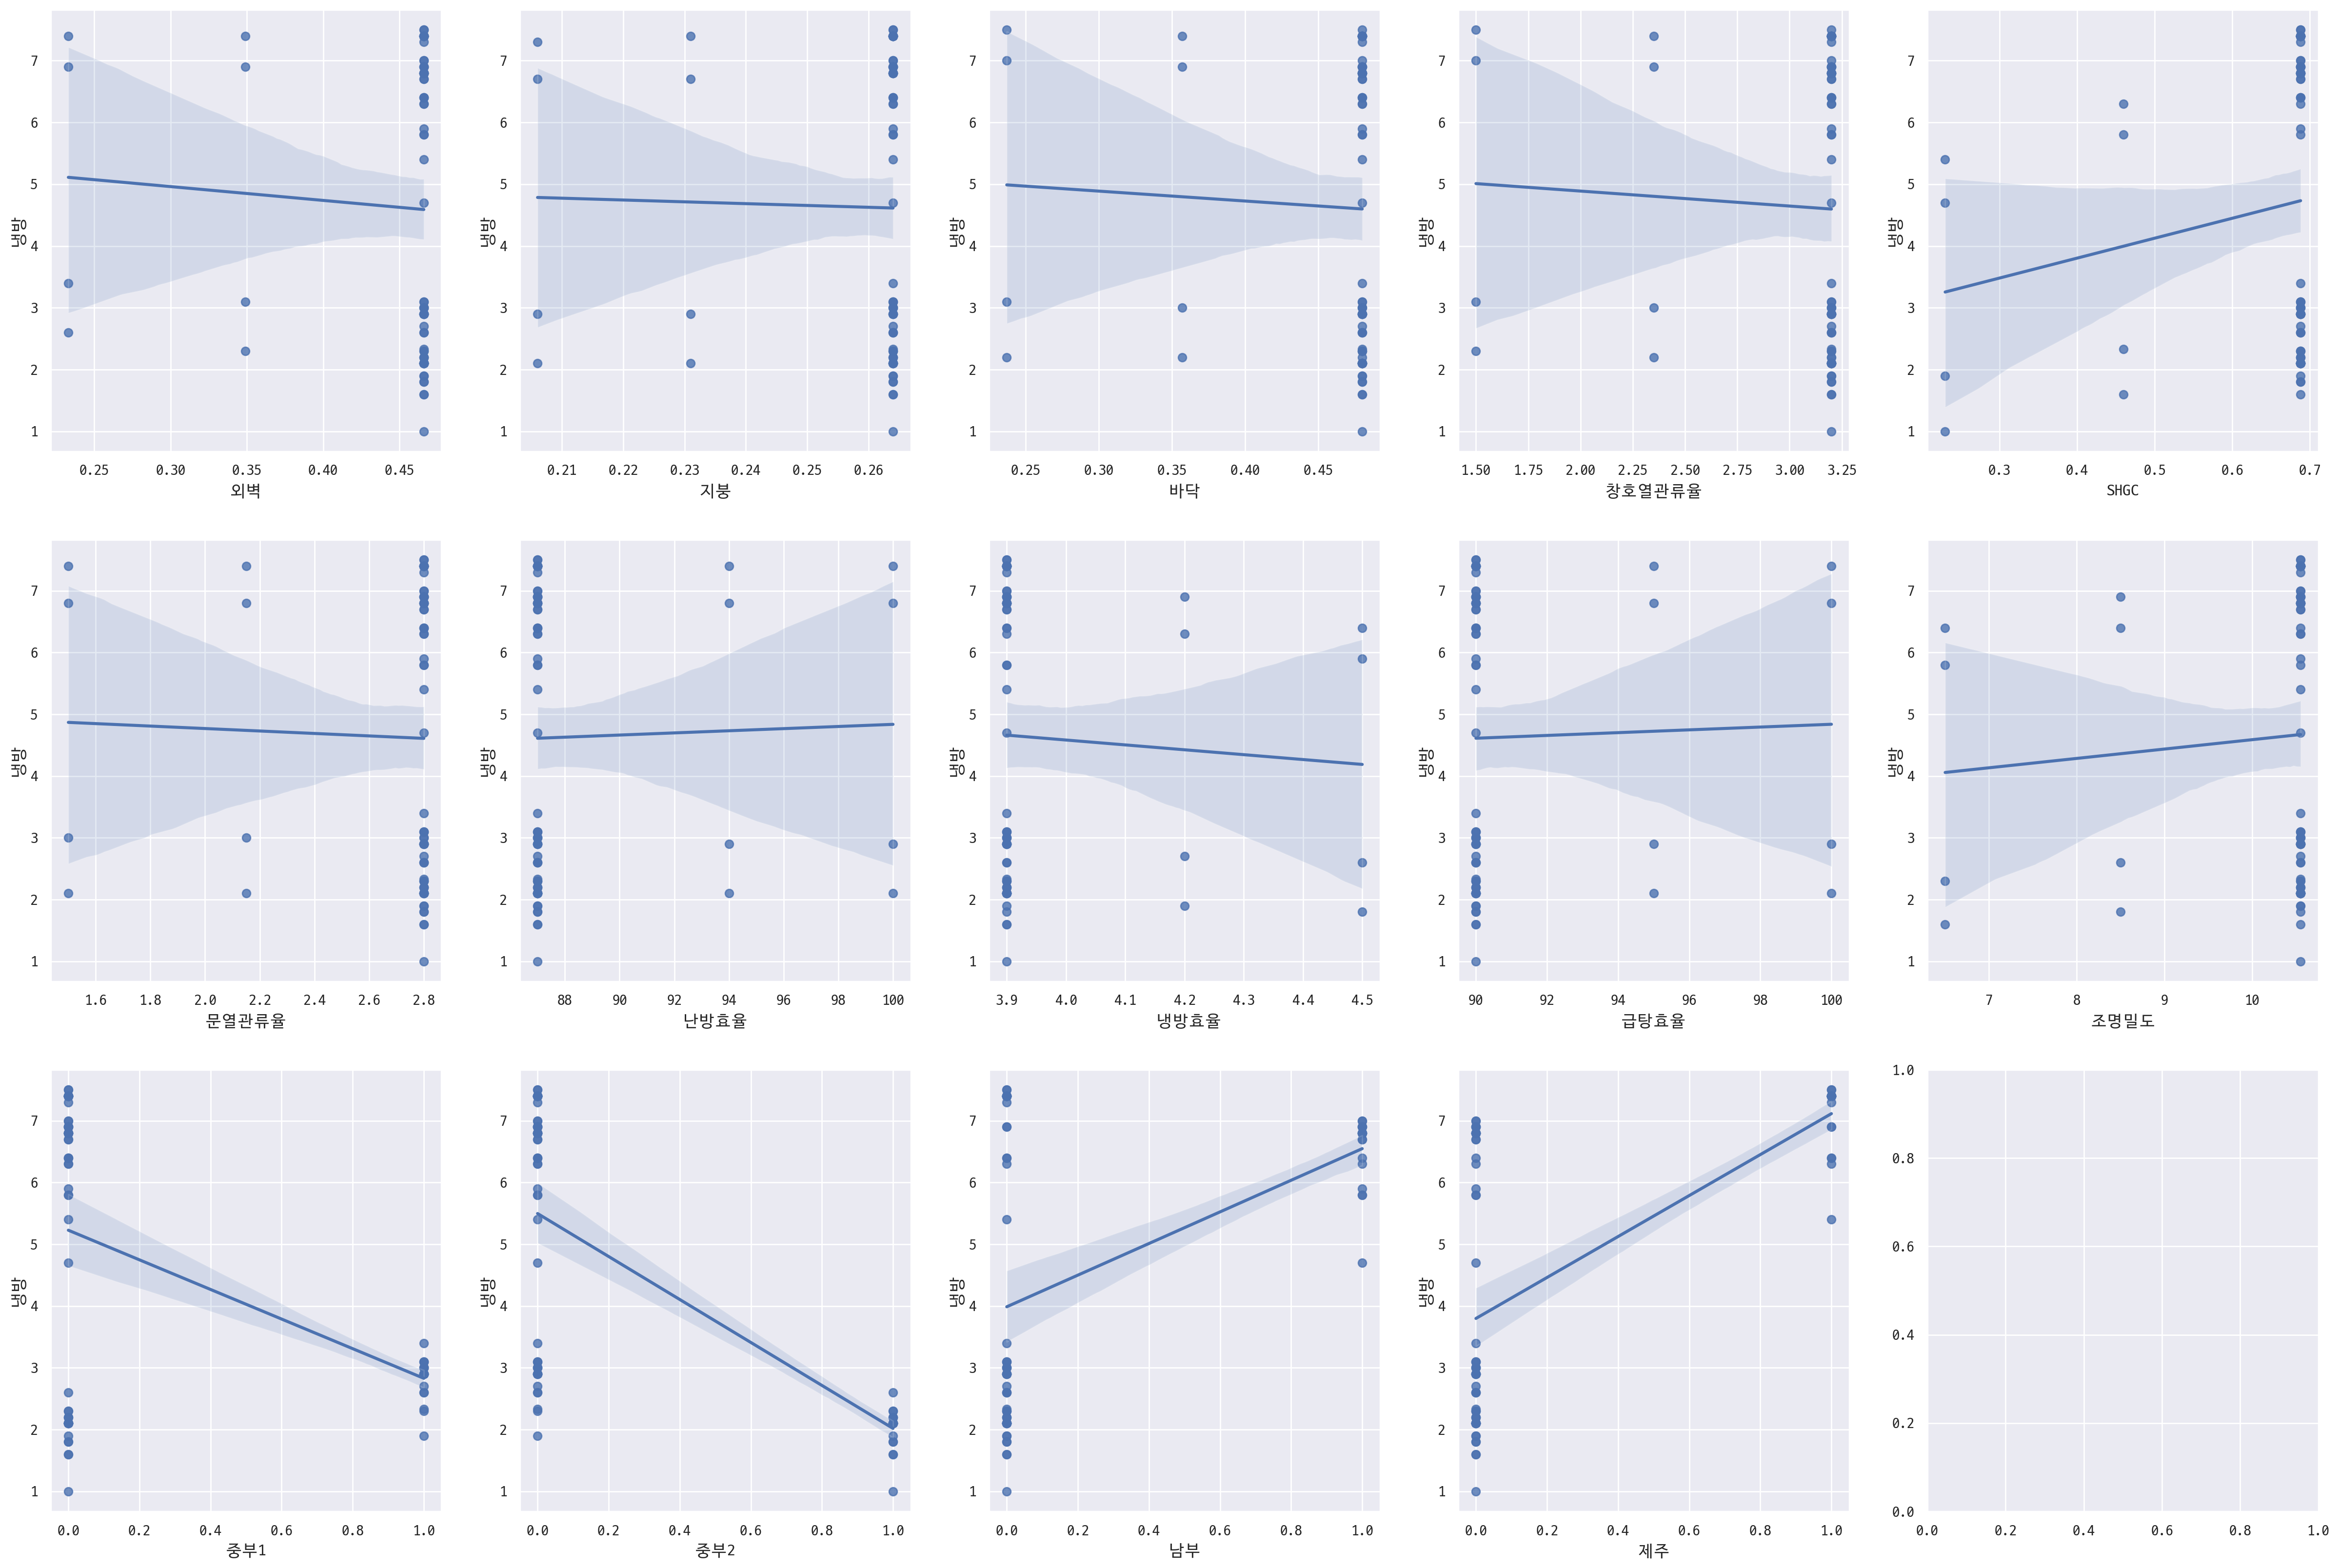

In [28]:
fig, axs = plt.subplots(figsize=(30, 20), ncols=5, nrows=3)

for i, feature in enumerate(lm_features):
    row = int(i/5)
    col = i%5
    #seaborn 의 regplot 을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='냉방', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='난방', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='급탕', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='환기', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='조명', data=df_raw, ax=axs[row][col])



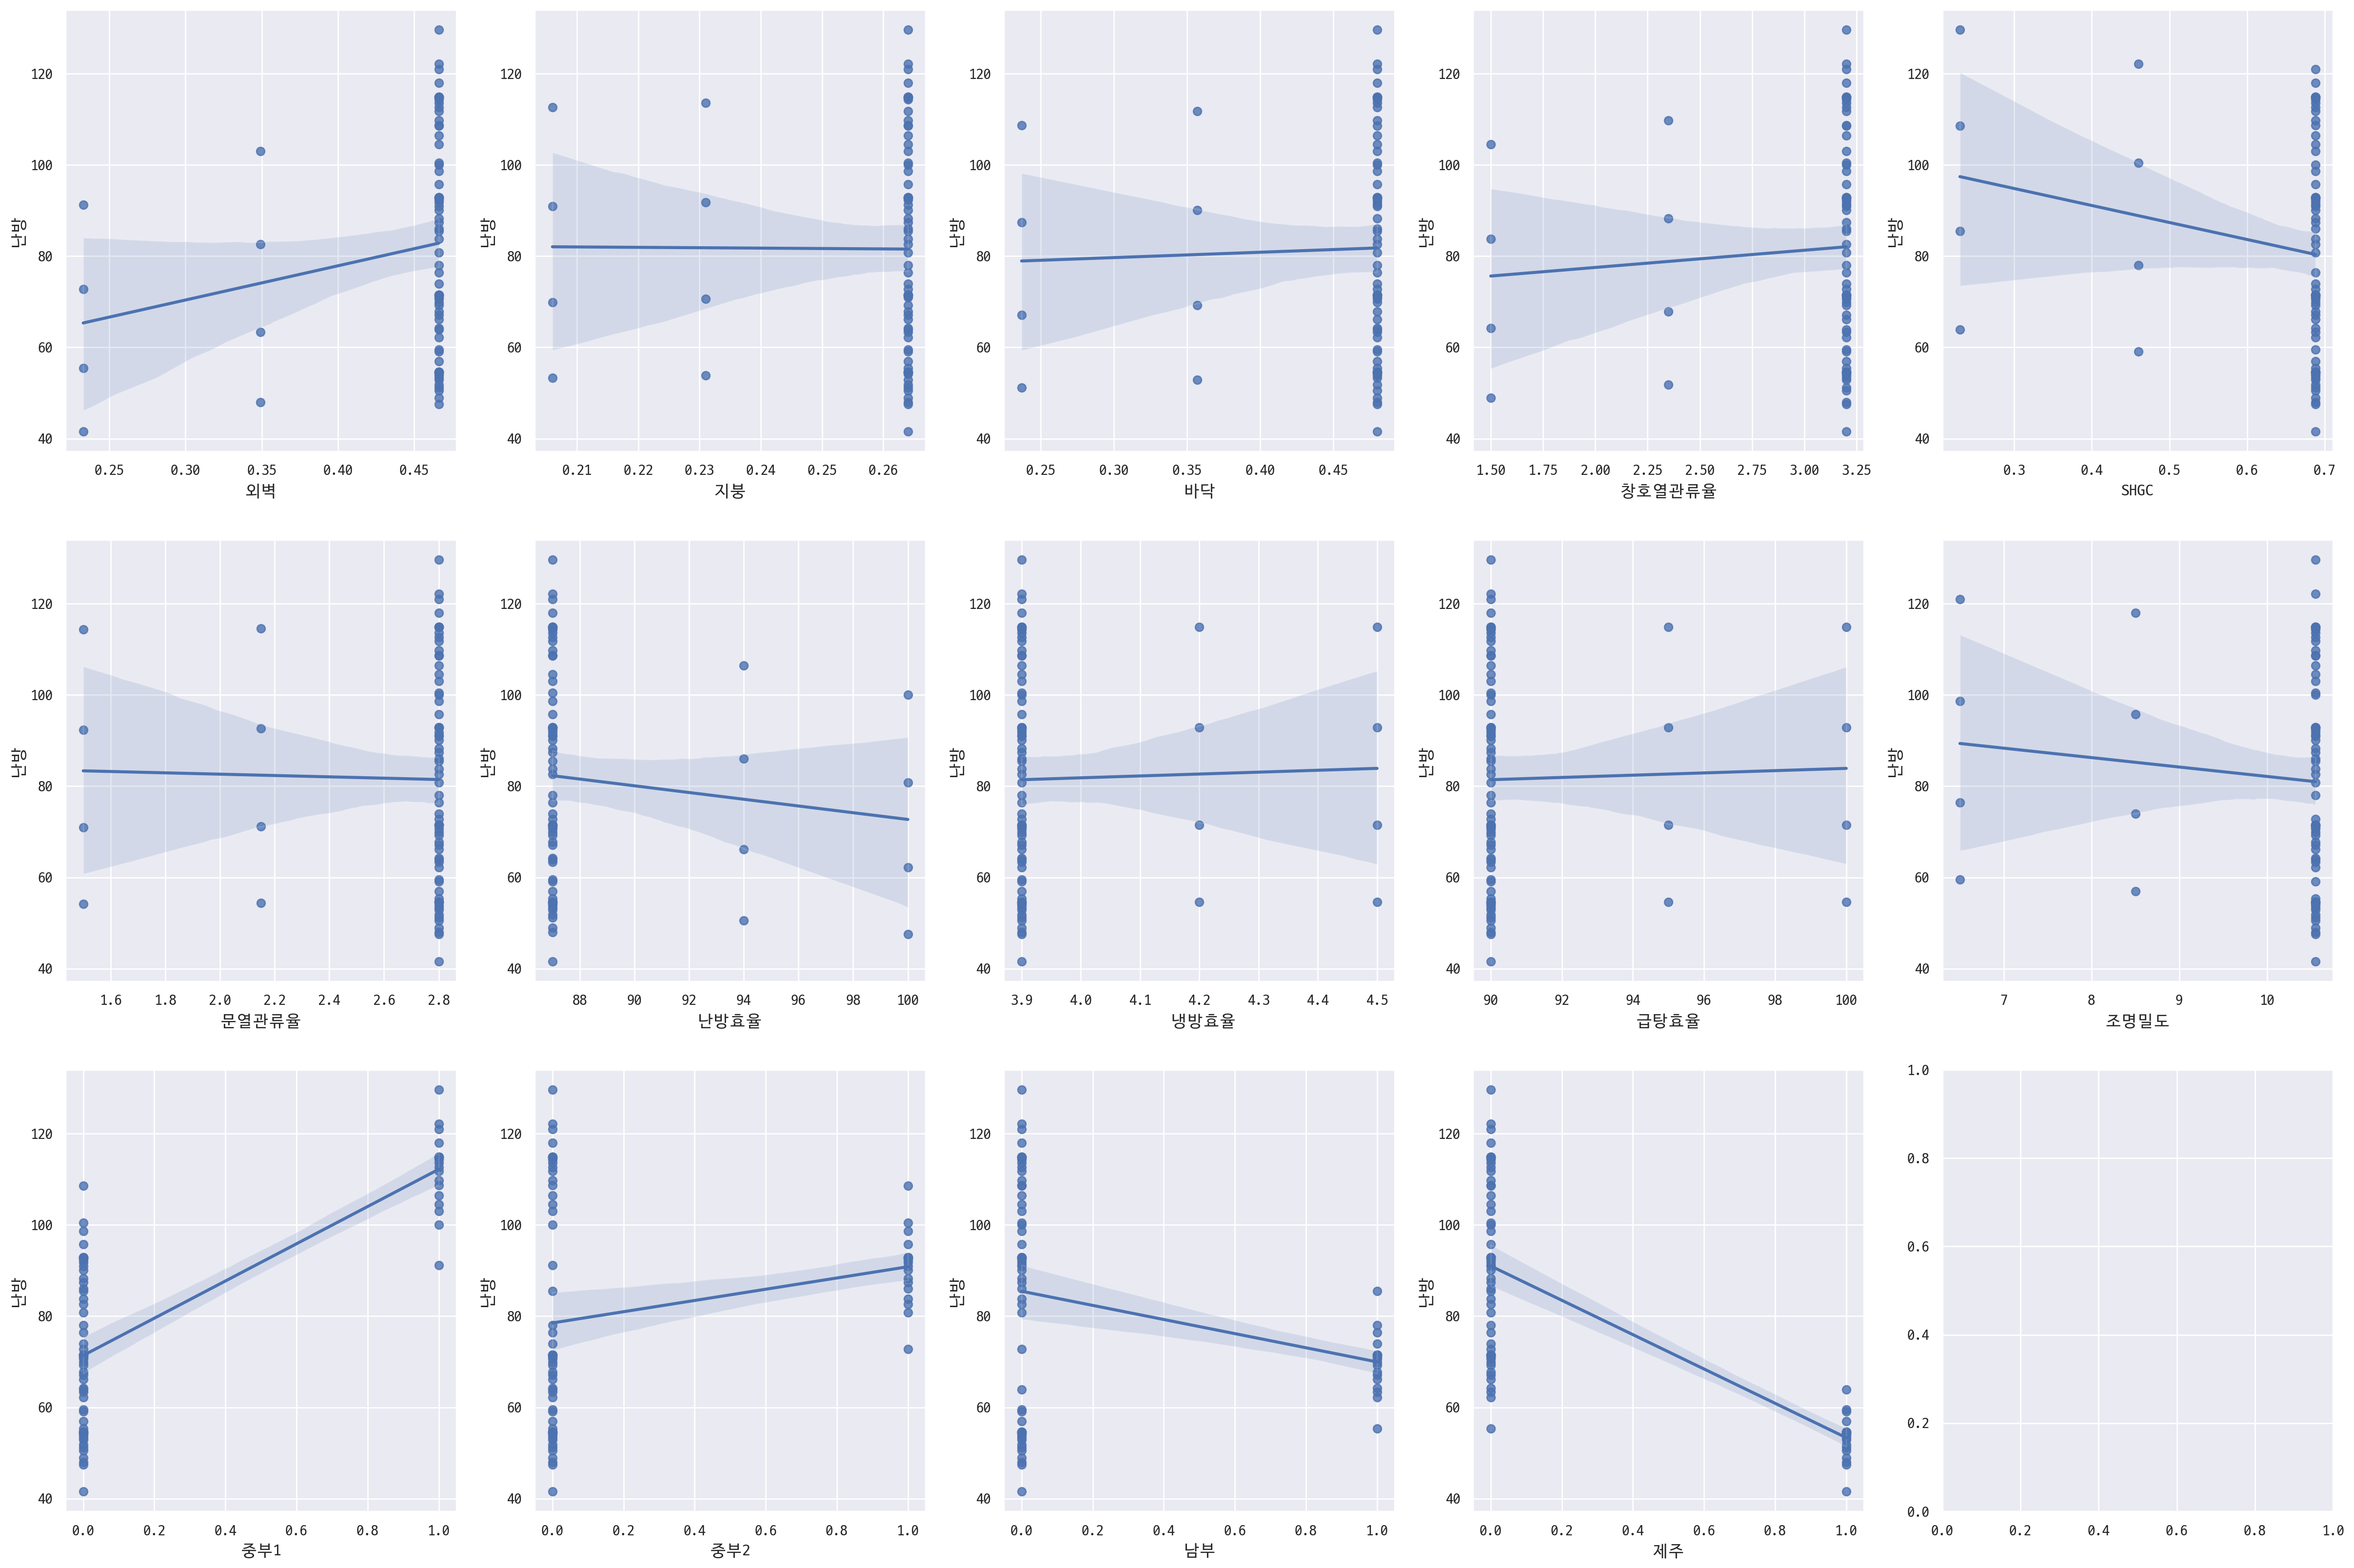

In [29]:
fig, axs = plt.subplots(figsize=(30, 20), ncols=5, nrows=3)

for i, feature in enumerate(lm_features):
    row = int(i/5)
    col = i%5
    #seaborn 의 regplot 을 이용해 산점도와 선형 회귀 직선을 함께 표현
    # sns.regplot(x=feature, y='냉방', data=df_raw, ax=axs[row][col])
    sns.regplot(x=feature, y='난방', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='급탕', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='환기', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='조명', data=df_raw, ax=axs[row][col])

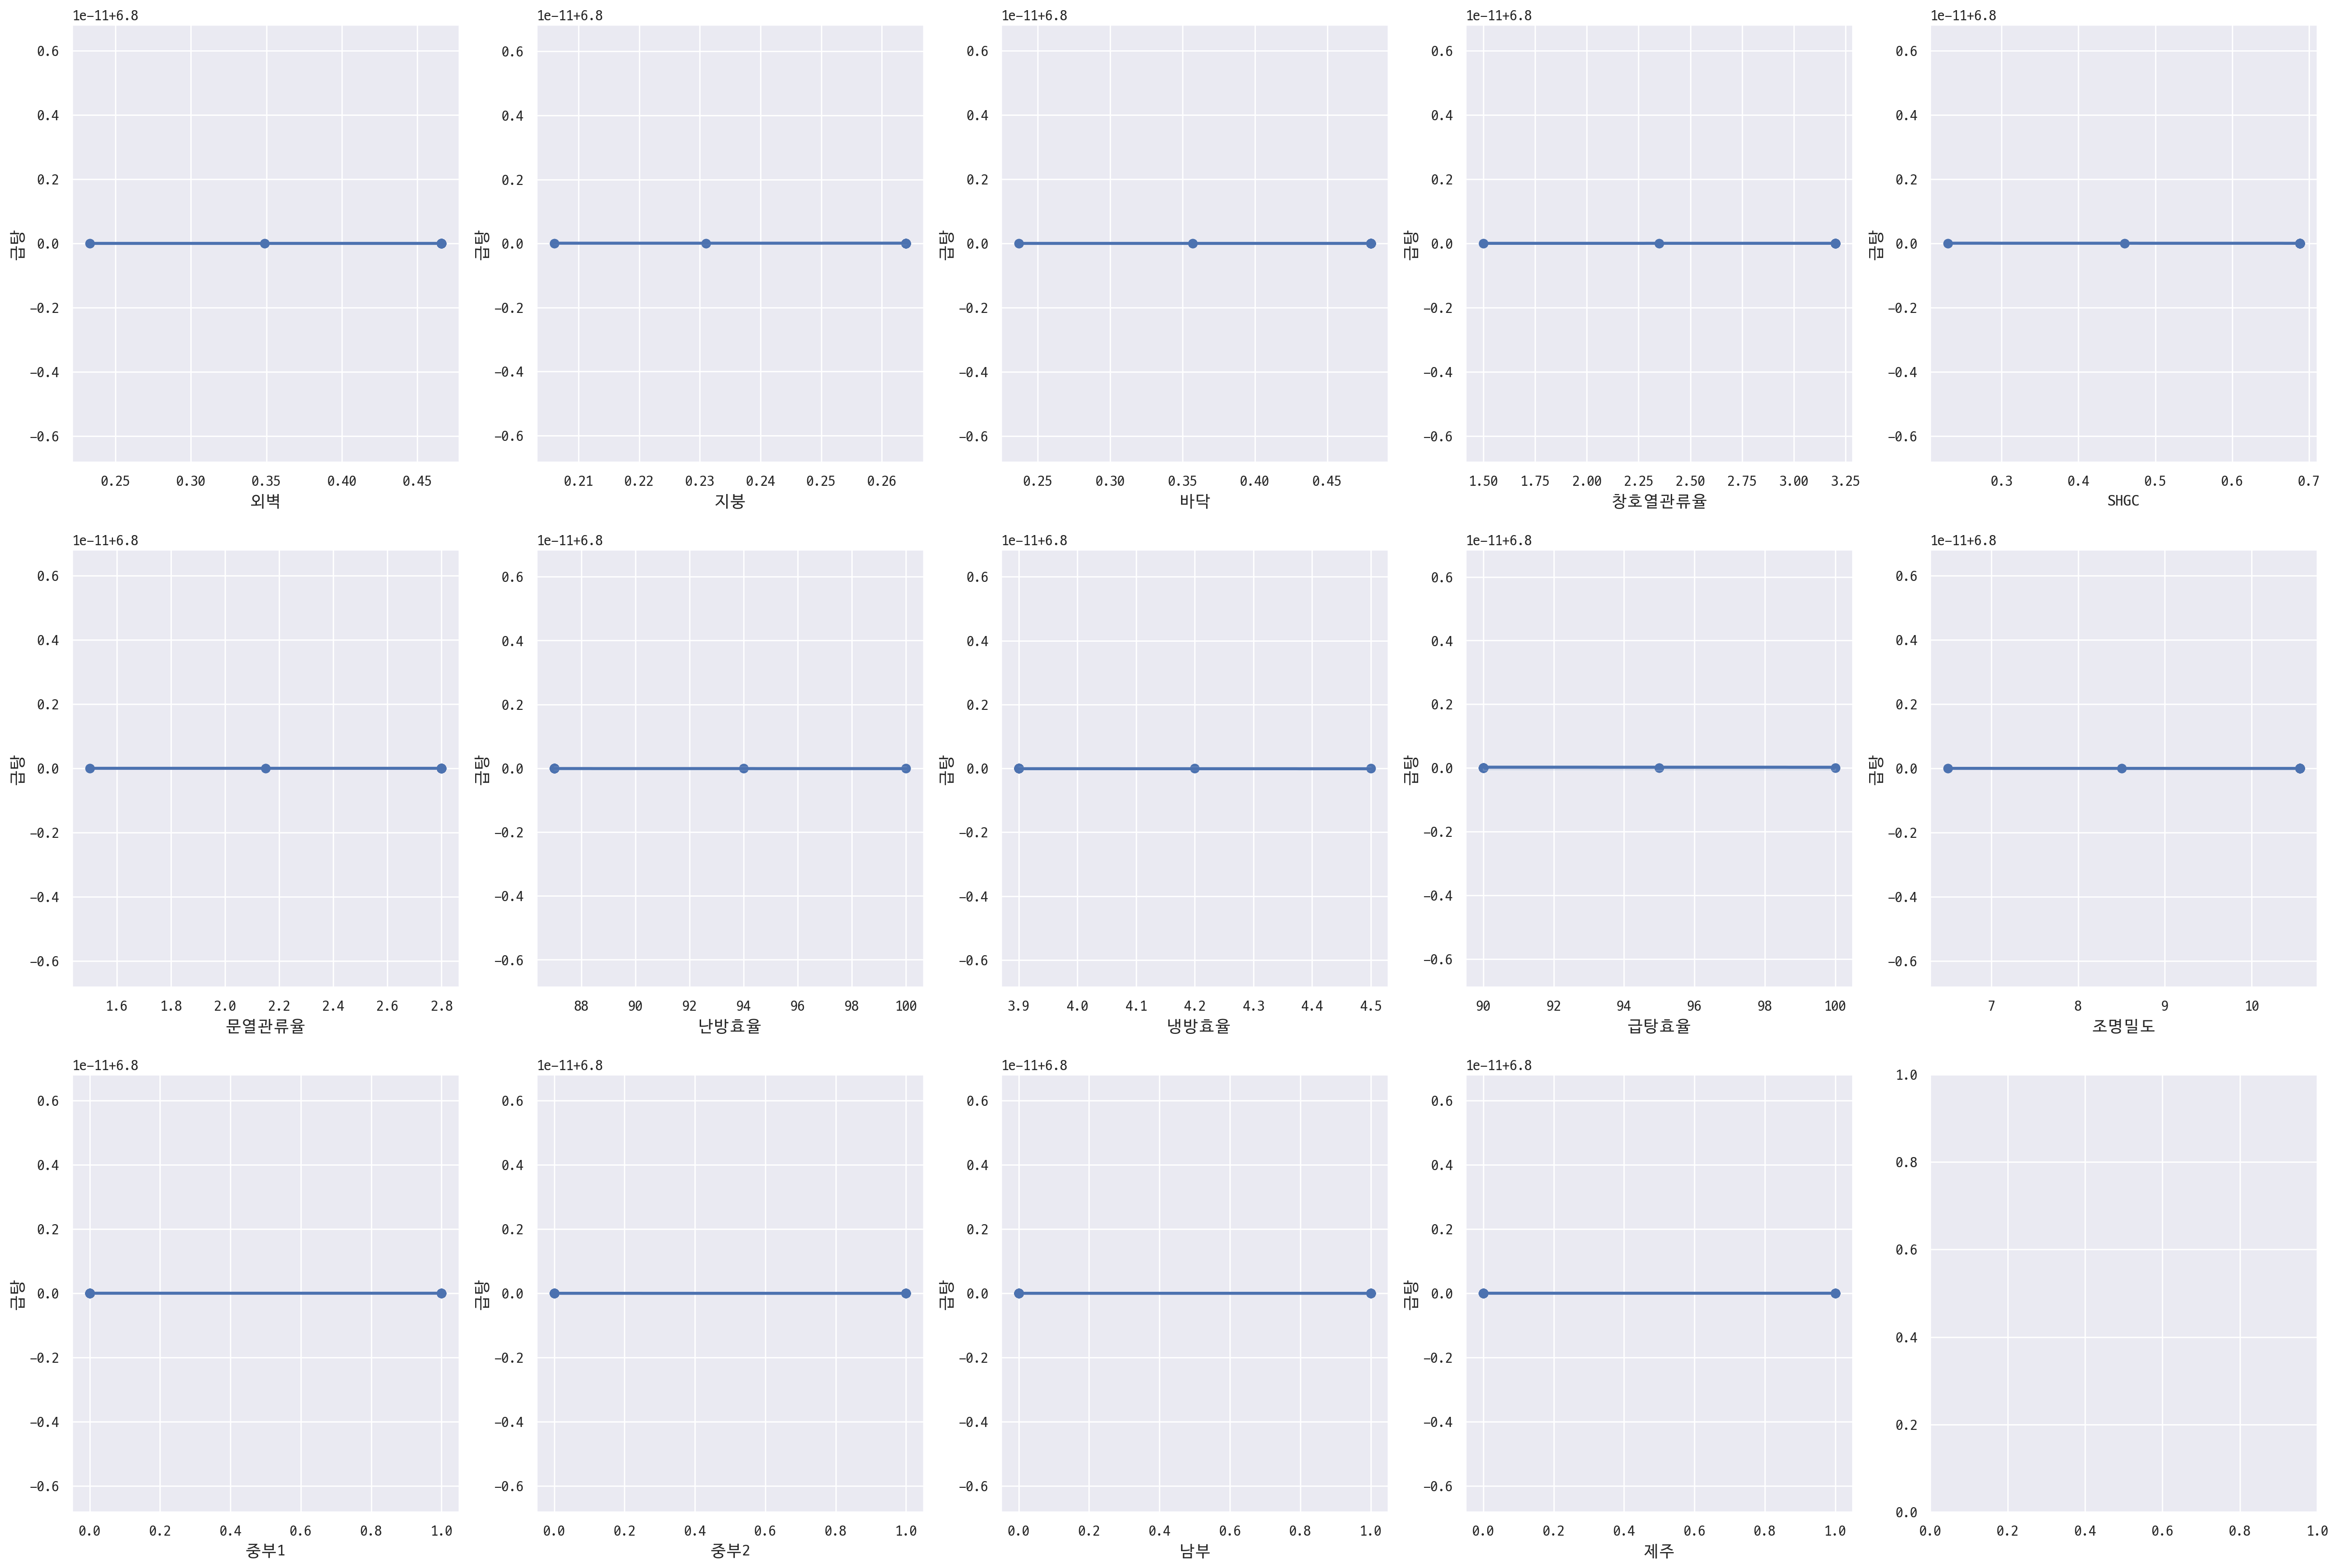

In [30]:
fig, axs = plt.subplots(figsize=(30, 20), ncols=5, nrows=3)

for i, feature in enumerate(lm_features):
    row = int(i/5)
    col = i%5
    #seaborn 의 regplot 을 이용해 산점도와 선형 회귀 직선을 함께 표현
    # sns.regplot(x=feature, y='냉방', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='난방', data=df_raw, ax=axs[row][col])
    sns.regplot(x=feature, y='급탕', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='환기', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='조명', data=df_raw, ax=axs[row][col])

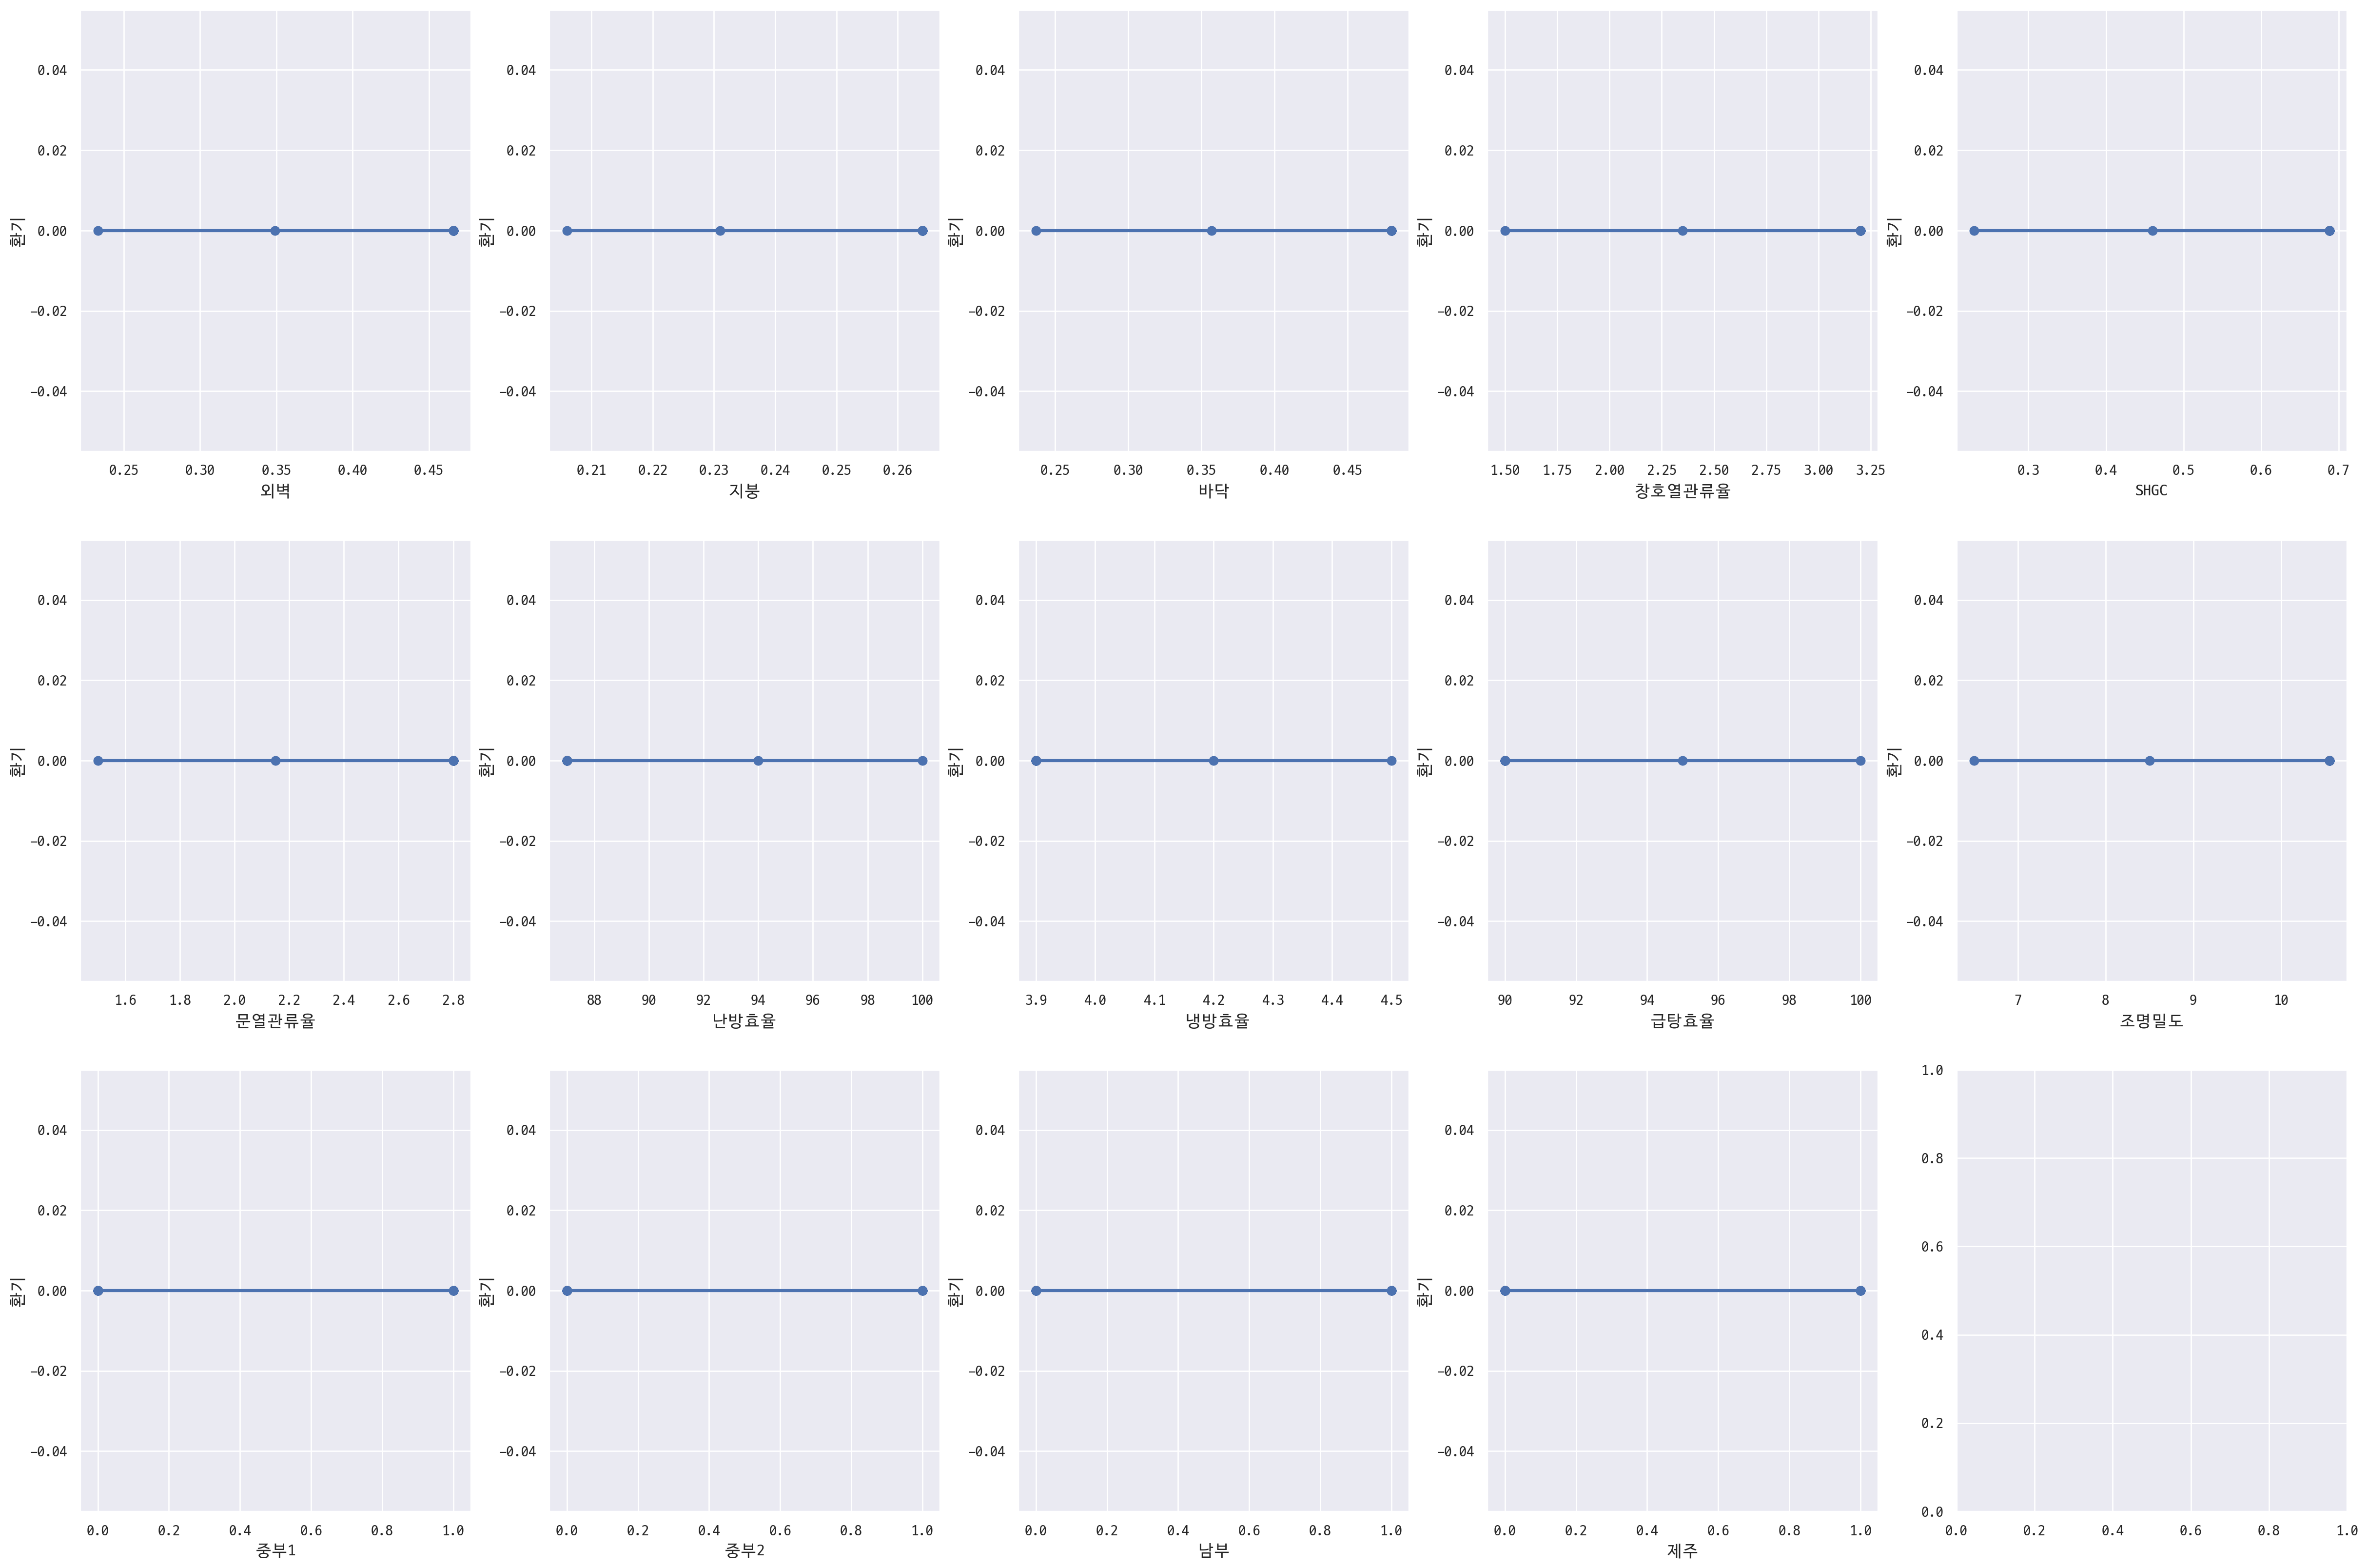

In [31]:
fig, axs = plt.subplots(figsize=(30, 20), ncols=5, nrows=3)

for i, feature in enumerate(lm_features):
    row = int(i/5)
    col = i%5
    #seaborn 의 regplot 을 이용해 산점도와 선형 회귀 직선을 함께 표현
    # sns.regplot(x=feature, y='냉방', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='난방', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='급탕', data=df_raw, ax=axs[row][col])
    sns.regplot(x=feature, y='환기', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='조명', data=df_raw, ax=axs[row][col])

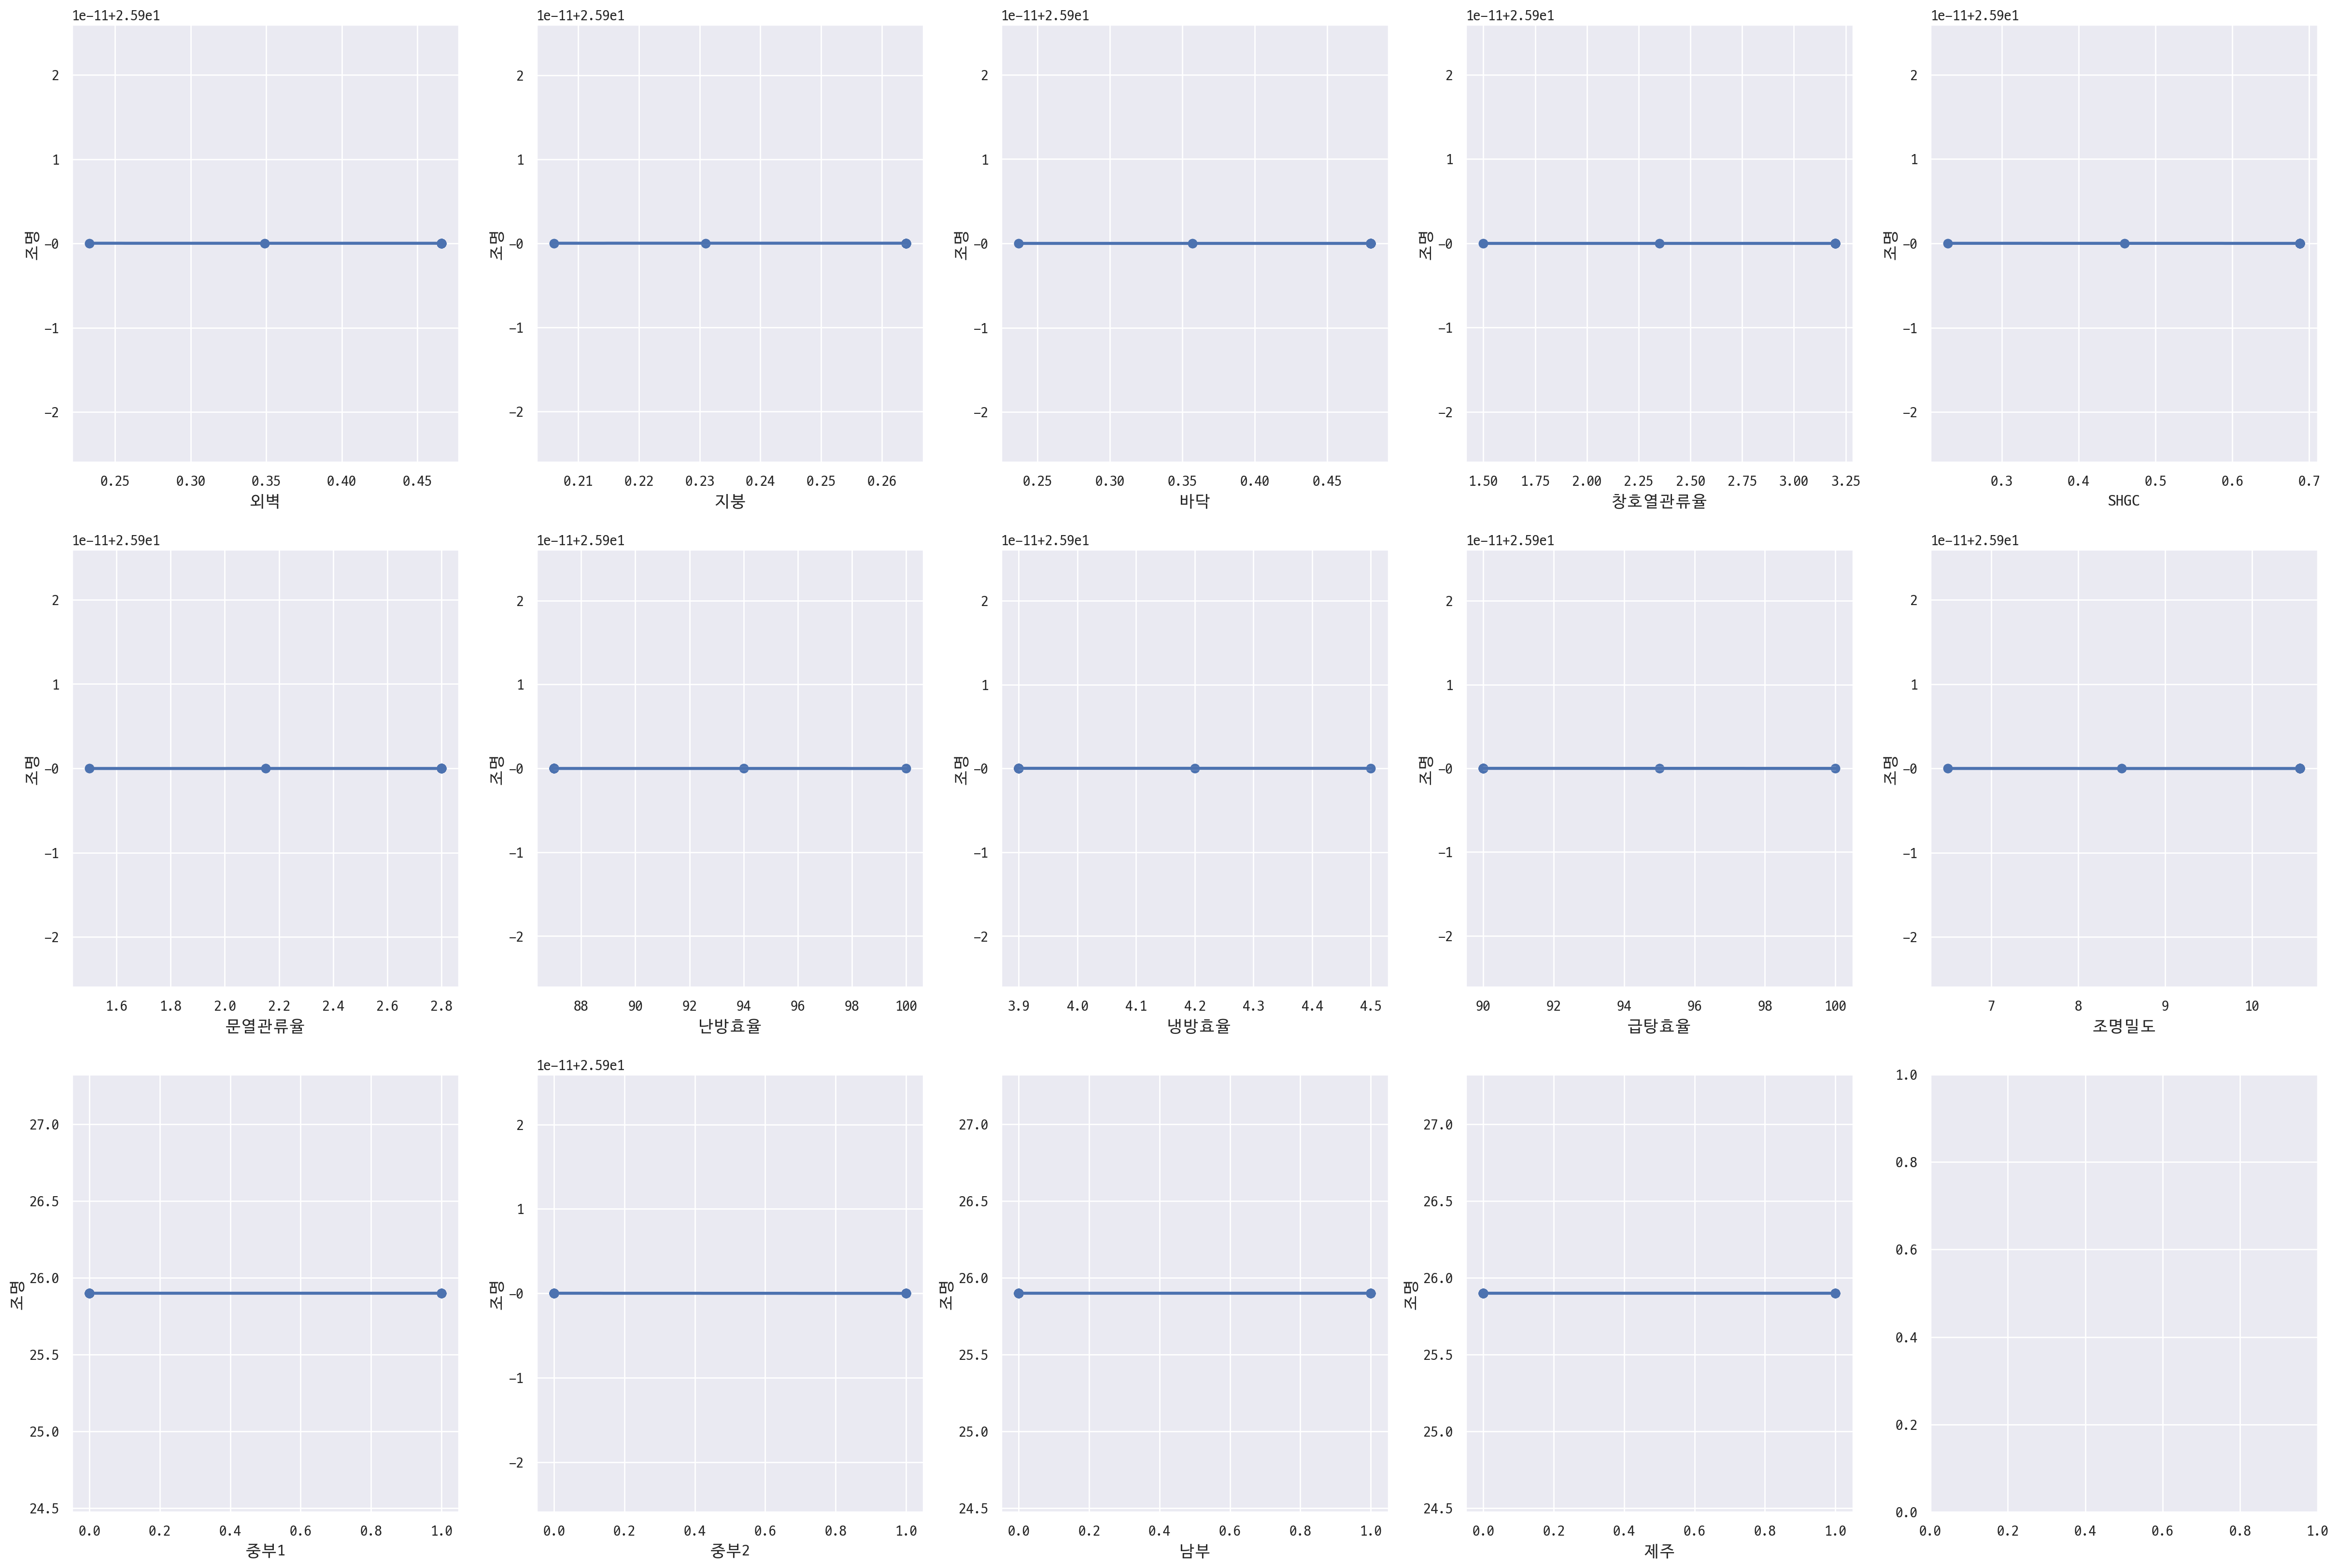

In [32]:
fig, axs = plt.subplots(figsize=(30, 20), ncols=5, nrows=3)

for i, feature in enumerate(lm_features):
    row = int(i/5)
    col = i%5
    #seaborn 의 regplot 을 이용해 산점도와 선형 회귀 직선을 함께 표현
    # sns.regplot(x=feature, y='냉방', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='난방', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='급탕', data=df_raw, ax=axs[row][col])
    # sns.regplot(x=feature, y='환기', data=df_raw, ax=axs[row][col])
    sns.regplot(x=feature, y='조명', data=df_raw, ax=axs[row][col])

In [33]:
# Index(['외벽', '지붕', '바닥', '창호열관류율', 'SHGC', '문열관류율', '난방효율', ' 냉방효율', '급탕효율',
#        '조명밀도', '중부1', '중부2', '남부', '제주', '난방', '냉방', '급탕', '조명', '환기'],
#       dtype='object')


X_data = df_raw.drop(df_raw[['난방', '냉방', '급탕', '조명', '환기']], axis=1, inplace=False)
Y_data = df_raw.drop(df_raw[['외벽', '지붕', '바닥', '창호열관류율', 'SHGC', '문열관류율', '난방효율', ' 냉방효율', '급탕효율',
       '조명밀도', '중부1', '중부2', '남부', '제주',]], axis=1, inplace=False)

X_train = X_data.copy()
y_train = Y_data.copy()

lr = LinearRegression()
lr.fit(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data , test_size=0.3, random_state=150)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))
print('절편값:',lr.intercept_)
print('회귀계수값:',np.round(lr.coef_, 1))
# print('회귀계수값:',lr.coef_)

MSE : 0.405, RMSE : 0.636
Variance score : -3.002
절편값: [119.65320555   5.5611685    6.8         25.9          0.        ]
회귀계수값: [[ 77.8  28.8  19.6   4.7 -29.4   0.3  -0.8   0.2   0.   -1.4  30.6   9.2
  -11.6 -28.2]
 [ -1.2   0.7  -0.7  -0.1   3.4  -0.    0.   -1.1   0.    0.2  -1.8  -2.6
    1.9   2.5]
 [ -0.   -0.   -0.   -0.   -0.   -0.    0.    0.    0.   -0.    0.   -0.
    0.   -0. ]
 [  0.    0.    0.    0.    0.    0.   -0.   -0.   -0.    0.   -0.    0.
   -0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0. ]]


In [30]:
# coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
# coeff

In [34]:
# 입력값들 임시설정


외벽 = 0.446
지붕 = 0.264
바닥 = 0.48
창호열관류율 = 3.2
SHGC = 0.688
문열관류율 = 2.8
난방효율 = 87
냉방효율 = 3.9
급탕효율 = 90
조명밀도 = 10.6
중부1 = 1
중부2 = 0
남부 = 0
제주 = 0

# 2차원으로
input = np.array([[
외벽,
지붕,
바닥,
창호열관류율,
SHGC,
문열관류율,
난방효율,
냉방효율,
급탕효율,
조명밀도,
중부1,
중부2,
남부,
제주,
    ]])


In [35]:
result = lr.predict(input)
result

c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([[112.33965588,   3.02791267,   6.8       ,  25.9       ,
          0.        ]])

In [36]:

df_result = pd.DataFrame(result, columns=['난방', '냉방', '급탕', '조명', '환기'])
df_result

,난방,냉방,급탕,조명,환기
0,112.339656,3.027913,6.8,25.9,0.0


In [37]:
df_result.iplot(kind='bar')